In [1]:
"""
    Group Project: Spam Classification using NLP
    Prepared by:
    Billah Syed Mashkur 1723387
    KM Zubair 1722931
    Tasnim Rafia 1725826
"""

import pandas as pd
import os
os.chdir("/Users/mashkur/Downloads")

dataset = pd.read_csv('Dataset - SPAM text message.csv')

print(dataset)

     label                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [2]:
#data cleaning...
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []

for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashkur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [3]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(dataset['label'])
y=y.iloc[:,1].values #remove first col (ham)

In [4]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

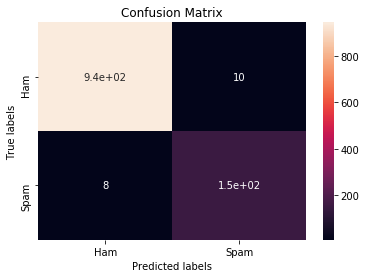

In [7]:
#result analysis
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax=ax)

#plotting confusion matrix with labels and colors
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

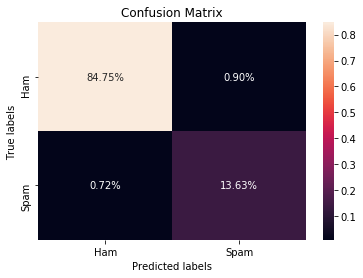

In [8]:
ax= plt.subplot()
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%',ax = ax)

#plotting confusion matrix as percentages with labels and colors
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam']);

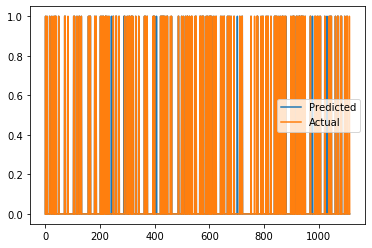

In [9]:
#plotting a 2D graph between y_test and y_pred
x1 = range(0, y_test.size)
y1 = y_test

x2 = range(0, y_pred.size)
y2 = y_pred

plt.plot(x2, y_pred, label='Predicted')
plt.plot(x1, y_test, label='Actual')

plt.legend()
plt.show()

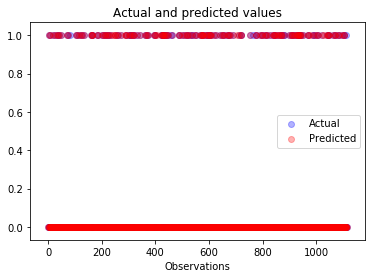

In [10]:
#scatterplotting
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('')
plt.legend()
plt.show()

In [11]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

In [12]:
print("Accuracy: ",accuracy*100,"%")
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

Accuracy:  98.38565022421525 %
Precision:  0.9382716049382716
Recall:  0.95
F1 Score:  0.9440993788819876
